# Analyze Texts

## Compare abstract embeddings

In [169]:
import pandas as pd
import spacy
from glob import glob
import json
from os.path import basename
from sklearn.decomposition import PCA
from sklearn.mixture import BayesianGaussianMixture
import plotly.express as px
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [98]:
nlp = spacy.load('en_core_web_lg')

In [3]:
jsonFilenames = glob('../data/texts/json/semanticScholar/*.json')

In [4]:
allData = {}
for jsonFilename in jsonFilenames: 
    with open(jsonFilename) as f: 
        rawFile = f.read()
    jsonData = json.loads(rawFile)
    if 'abstract' in jsonData: 
        allData[basename(jsonFilename)] = jsonData

In [5]:
len(allData)

274

In [6]:
df = pd.DataFrame(allData).T

## Average year of publication

In [7]:
df['year'].mean()

2010.6959706959708

In [8]:
df.columns

Index(['paperId', 'externalIds', 'url', 'title', 'abstract', 'venue', 'year',
       'referenceCount', 'citationCount', 'influentialCitationCount',
       'isOpenAccess', 'fieldsOfStudy', 'authors'],
      dtype='object')

## Texts sorted by highest citation count

In [9]:
df.sort_values('citationCount', ascending=False).head(20)[['title', 'authors', 'citationCount']]

,title,authors,citationCount
JJWEWH5N.json,Understanding Media: The Extensions of Man,"[{'authorId': '32996996', 'name': 'M. Mcluhan'}]",9126
2N49FVDE.json,We Have Never Been Modern,"[{'authorId': '47701965', 'name': 'B. Latour'}]",8411
L8YC3BR8.json,Regional Advantage: Culture and Competition in...,"[{'authorId': '1423411984', 'name': 'A. Chandl...",6776
5M6SZ7NI.json,Bitcoin : A Peer-to-Peer Electronic Cash System,"[{'authorId': '38219008', 'name': 'Satoshi Nak...",5989
M5UMJG3R.json,Leadership: Theory and Practice,"[{'authorId': '113329495', 'name': 'P. Northou...",4695
AJQAAMWM.json,The spread of true and false news online,"[{'authorId': '1918441', 'name': 'Soroush Voso...",2551
3X2UYKXM.json,The social shaping of technology,"[{'authorId': '2116648759', 'name': 'Robin Wil...",2290
A2BJ7NVH.json,The Singularity Is Near: When Humans Transcend...,"[{'authorId': '2186634', 'name': 'R. Kurzweil'}]",2103
3934WUN2.json,Experimental evidence of massive-scale emotion...,"[{'authorId': '1845400', 'name': 'Adam D. I. K...",2073
ICJPYWGA.json,The Ethnography of Infrastructure,"[{'authorId': '1730598', 'name': 'S. L. Star'}]",2065


## Texts Sorted by highest influential citation count

In [10]:
df.sort_values('influentialCitationCount', ascending=False)[['title', 'authors', 'influentialCitationCount']]

,title,authors,influentialCitationCount
5M6SZ7NI.json,Bitcoin : A Peer-to-Peer Electronic Cash System,"[{'authorId': '38219008', 'name': 'Satoshi Nak...",1310
M5UMJG3R.json,Leadership: Theory and Practice,"[{'authorId': '113329495', 'name': 'P. Northou...",650
L8YC3BR8.json,Regional Advantage: Culture and Competition in...,"[{'authorId': '1423411984', 'name': 'A. Chandl...",486
2N49FVDE.json,We Have Never Been Modern,"[{'authorId': '47701965', 'name': 'B. Latour'}]",381
JJWEWH5N.json,Understanding Media: The Extensions of Man,"[{'authorId': '32996996', 'name': 'M. Mcluhan'}]",358
...,...,...,...
JPFIKADG.json,"Review of ""Weapons of Math Destruction: How Bi...","[{'authorId': '121222013', 'name': 'Cory Malon...",0
J7ZH4Q2N.json,"Three Views of Logic: Mathematics, Philosophy,...","[{'authorId': '3043218', 'name': 'D. Loveland'...",0
T2PNBSD5.json,Value scenarios: a technique for envisioning s...,"[{'authorId': '34869420', 'name': 'L. Nathan'}...",0
4K4B5FLS.json,"Automation, Algorithms, and Politics | When th...","[{'authorId': '1829115', 'name': 'Christian Sa...",0


In [11]:
docsWithAbstracts = df[df['abstract'].notnull()]

In [12]:
docsWithAbstracts[['title', 'abstract']]

,title,abstract
VDEEJGMF.json,On Overcoming Imposter Syndrome.,"Academic Medicine, Vol. 92, No. 8 / August 201..."
49ZBRC7R.json,The Breakup 2.0: Disconnecting over New Media,"A few generations ago, college students showed..."
YXU8PNX2.json,Introduction to Web Accessibility,With raised awareness and accessibility laws e...
3NVMZK68.json,The Computer from Pascal to von Neumann,"From the Publisher: \nIn 1942, Lt. Herman H. G..."
HSVN86Y6.json,UNESCO and INFOethics: Seeking global ethical ...,UNESCO puts information ethics on the agenda o...
...,...,...
ED8C2TD9.json,Review: The Social Shaping of Technology,The depth of the collection is given an histor...
M5YDMSXV.json,Do Artifacts Have Politics,"In controversies about technology and society,..."
2QGYL4FM.json,How the machine ‘thinks’: Understanding opacit...,This article considers the issue of opacity as...
GKZGQRD8.json,"The Drama! Teen Conflict, Gossip, and Bullying...","While teenage conflict is nothing new, today’s..."


# What academic fields are the most represented? 

In [147]:
allFields = []
for fieldList in df.fieldsOfStudy.values: 
    if fieldList is None: 
        continue
    if type(fieldList) == list: 
        for item in fieldList: 
            allFields.append(item)

In [157]:
fieldStatsDf = pd.DataFrame(pd.Series(Counter(allFields)))

In [160]:
fieldStatsDf['field'] = fieldStatsDf.index

In [161]:
fieldStatsDf['n_papers'] = fieldStatsDf[0]

In [163]:
del fieldStatsDf[0]

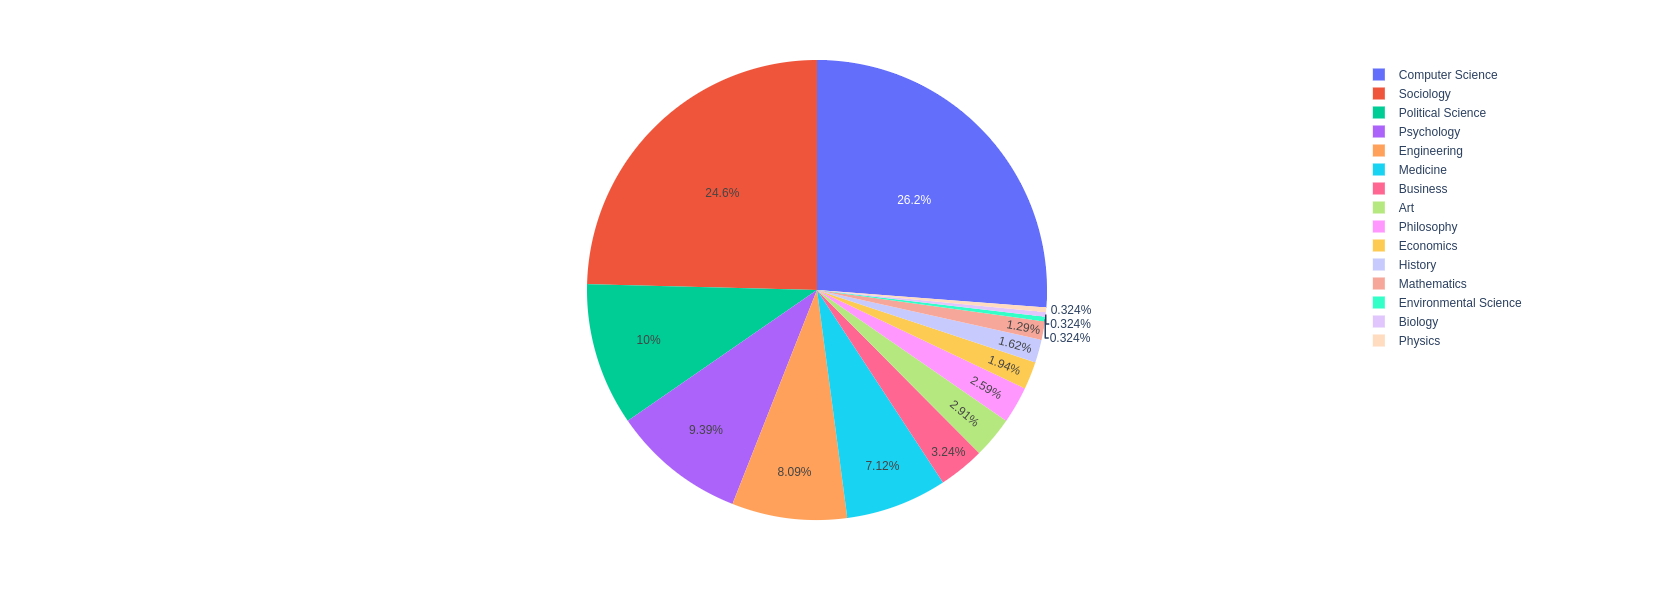

In [168]:
px.pie(fieldStatsDf, names='field', values='n_papers', height=600)

In [218]:
df

,paperId,externalIds,url,title,abstract,venue,year,referenceCount,citationCount,influentialCitationCount,isOpenAccess,fieldsOfStudy,authors
VDEEJGMF.json,02f3cf6681d4818fa61bd68b9102e468990cfcbf,"{'MAG': '2741907776', 'DOI': '10.1097/ACM.0000...",https://www.semanticscholar.org/paper/02f3cf66...,On Overcoming Imposter Syndrome.,"Academic Medicine, Vol. 92, No. 8 / August 201...",Academic medicine : journal of the Association...,2017,5,22,2,False,[Medicine],"[{'authorId': '1999945617', 'name': 'Rebecca R..."
BMW3IWPH.json,cb8d9b56866470b44099a33f9f4f9d791d37d236,{'MAG': '2798497543'},https://www.semanticscholar.org/paper/cb8d9b56...,Buda's Wagon: A Brief History of the Car Bomb,None,,2007,0,46,4,False,[History],"[{'authorId': '118710965', 'name': 'M. Davis'}]"
5D9IPFXG.json,7a30503932a4009aa5bd2b2d67712a55edd71b06,{'MAG': '2783095890'},https://www.semanticscholar.org/paper/7a305039...,Technology vs. Humanity: The coming clash betw...,None,,2016,0,26,1,False,[Sociology],"[{'authorId': '101671549', 'name': 'Gerd Leonh..."
82TIUIHZ.json,9aa6574126be3a9567a9c1811c0fbef81c088c9f,{},https://www.semanticscholar.org/paper/9aa65741...,Networked Theology: Negotiating Faith in Digit...,None,,None,0,0,0,False,None,"[{'authorId': '144257955', 'name': 'S. Garner'}]"
USRDR4GH.json,e2314316300ed6c801398a135a3e0d5df048a894,{'MAG': '3106821106'},https://www.semanticscholar.org/paper/e2314316...,[Review] The Age of AI: Artificial Intelligenc...,None,,2020,0,0,0,False,[Psychology],"[{'authorId': '119564173', 'name': 'J. R. Paul..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
M5YDMSXV.json,260cd45d1925551364ea4c6d02e3eebf79e48471,"{'MAG': '1498112155', 'DOI': '10.4324/97813152...",https://www.semanticscholar.org/paper/260cd45d...,Do Artifacts Have Politics,"In controversies about technology and society,...",,2017,29,1211,26,True,[Political Science],"[{'authorId': '8074315', 'name': 'L. Winner'}]"
2QGYL4FM.json,91e36e1c6e3d4a5bdc97fa5ab5b89bdf9113413d,"{'MAG': '2189632871', 'DOI': '10.1177/20539517...",https://www.semanticscholar.org/paper/91e36e1c...,How the machine ‘thinks’: Understanding opacit...,This article considers the issue of opacity as...,,2016,39,786,38,False,[Computer Science],"[{'authorId': '48129731', 'name': 'J. Burrell'}]"
GKZGQRD8.json,5074cddca9b19ca13caedf709f874ae6d045c2ef,"{'MAG': '1573875084', 'DOI': '10.31219/osf.io/...",https://www.semanticscholar.org/paper/5074cddc...,"The Drama! Teen Conflict, Gossip, and Bullying...","While teenage conflict is nothing new, today’s...",,2011,11,85,5,True,[Psychology],"[{'authorId': '2929988', 'name': 'Alice E. Mar..."
I8UGLG4U.json,89990f961cd37ad576068b3a9af0a24a36c2fe65,"{'MAG': '2331567494', 'DOI': '10.2139/SSRN.275...",https://www.semanticscholar.org/paper/89990f96...,Moral Crumple Zones: Cautionary Tales in Human...,A prevailing rhetoric in human-robot interacti...,,2016,0,16,0,False,[Political Science],"[{'authorId': '21817215', 'name': 'M. Elish'}]"


In [219]:
df.columns

Index(['paperId', 'externalIds', 'url', 'title', 'abstract', 'venue', 'year',
       'referenceCount', 'citationCount', 'influentialCitationCount',
       'isOpenAccess', 'fieldsOfStudy', 'authors'],
      dtype='object')

## Derive document embeddings, reduce with PCA, visualize

In [13]:
docsWithAbstractsDict = docsWithAbstracts.to_dict()

In [14]:
labels = []
abstractDocs = []
for i, row in docsWithAbstracts.iterrows(): 
    abstractDocs.append(nlp(row['abstract']))
    labels.append(row['title'])

In [15]:
vecs = [doc.vector for doc in abstractDocs]

In [16]:
pca = PCA(n_components=3)

In [17]:
threeDimensionalVecs = pca.fit_transform(vecs)

In [18]:
df3d = pd.DataFrame(threeDimensionalVecs, index=labels)

In [19]:
df3d['title'] = df3d.index

In [20]:
df3d

,0,1,2,title
On Overcoming Imposter Syndrome.,-0.053554,-0.115794,0.049201,On Overcoming Imposter Syndrome.
The Breakup 2.0: Disconnecting over New Media,-0.136819,-0.163527,0.360202,The Breakup 2.0: Disconnecting over New Media
Introduction to Web Accessibility,-0.320572,0.144301,-0.031839,Introduction to Web Accessibility
The Computer from Pascal to von Neumann,0.176389,-0.307023,0.229065,The Computer from Pascal to von Neumann
UNESCO and INFOethics: Seeking global ethical values in the Information Society,-0.167124,0.223986,-0.170036,UNESCO and INFOethics: Seeking global ethical ...
...,...,...,...,...
Review: The Social Shaping of Technology,0.071699,-0.229546,0.370591,Review: The Social Shaping of Technology
Do Artifacts Have Politics,-0.033217,-0.120698,0.134927,Do Artifacts Have Politics
How the machine ‘thinks’: Understanding opacity in machine learning algorithms,-0.104938,0.035229,-0.232185,How the machine ‘thinks’: Understanding opacit...
"The Drama! Teen Conflict, Gossip, and Bullying in Networked Publics",-0.076307,-0.063573,0.130439,"The Drama! Teen Conflict, Gossip, and Bullying..."


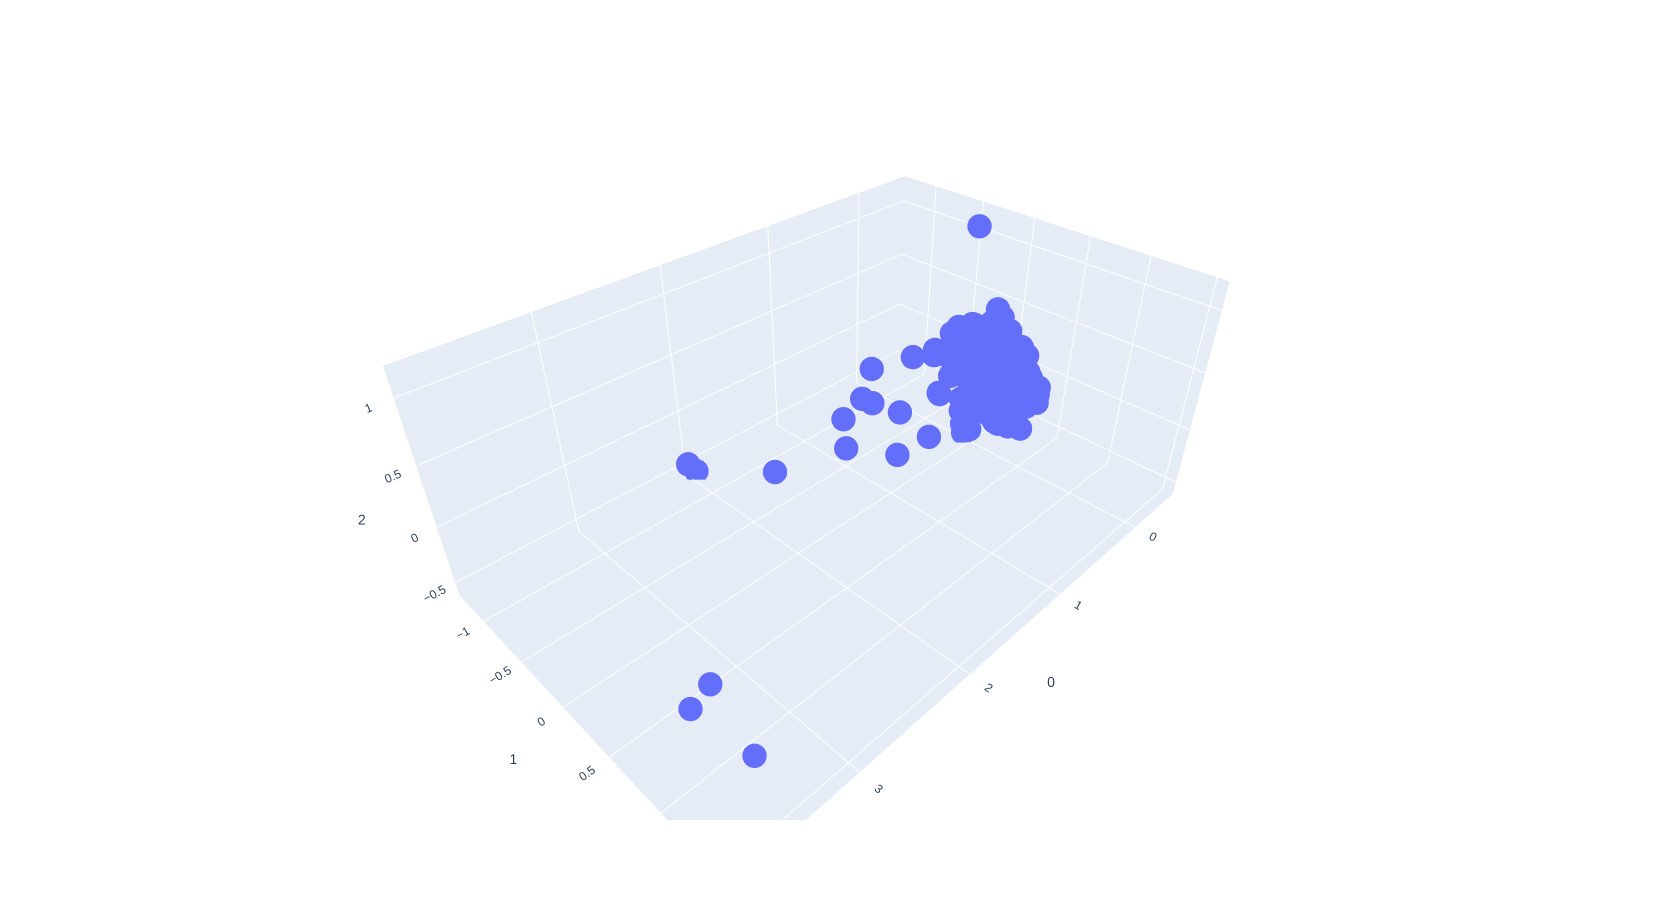

In [217]:
px.scatter_3d(df3d, x=0, y=1, z=2, hover_name='title', height=900)

## Cluster without reducing

In [24]:
bgmix = BayesianGaussianMixture(n_components=3)

In [25]:
predictions = bgmix.fit_predict(vecs)

In [26]:
nGroups = max(predictions) + 1
groups = {i: [] for i in range(nGroups)}
for i, k in enumerate(predictions): 
    groups[k].append(labels[i])
    

In [27]:
groups

{0: ['Introduction to Web Accessibility',
  'UNESCO and INFOethics: Seeking global ethical values in the Information Society',
  'The Influence of Gender-Ethnic Intersectionality on Gender Stereotypes about IT Skills and Knowledge',
  'Algorithms in practice: Comparing web journalism and criminal justice',
  'Big Data Surveillance: The Case of Policing',
  'Site Selection Bias in Program Evaluation',
  "Why media companies insist they're not media companies, why they're wrong, and why it matters",
  'Beyond the Belmont Principles: Ethical Challenges, Practices, and Beliefs in the Online Data Research Community',
  'Gender and Diversity in Collaborative Virtual Teams',
  'Accounting for Market Frictions and Power Asymmetries in Online Labor Markets',
  '"Algorithms ruin everything": #RIPTwitter, Folk Theories, and Resistance to Algorithmic Change in Social Media',
  'Big Data ethics',
  'Digital Materialisms: Frameworks for Digital Media Studies',
  'The Onlife Manifesto: Being Human in

In [28]:
df[df['title'] == 'When Computers Were Women']['abstract']

MASE7ZWB.json    L'auteur retablit la verite sur l'histoire des...
Name: abstract, dtype: object

## Throw out Outliners and Try Again

In [33]:
kmeans = KMeans(n_clusters=3)

In [34]:
kmeans.fit_predict(threeDimensionalVecs)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [35]:
df3d['kmeans'] = kmeans.fit_predict(threeDimensionalVecs)

In [46]:
[df3d[df3d['kmeans'] == 0][i].mean() for i in [0, 1, 2]] # Get the centroid

[-0.14112803815305963, 0.016417075345622936, 0.006613554410748701]

In [47]:
kmeans.cluster_centers_

array([[-0.14112804,  0.01641708,  0.00661355],
       [ 3.71984017,  1.32040718,  0.28507483],
       [ 1.43599407, -0.64517118, -0.19258303]])

In [86]:
centroid = np.array(kmeans.cluster_centers_[0]).reshape(-1, 1)

In [77]:
def similarityToCentroid(points, centroid=kmeans.cluster_centers_[0]): 
    """ 
    Let's figure out how similar each point is to the center of the main cluster. 
    """
    return cosine_similarity(arr, centroid)

In [88]:
testPoint = df3d.iloc[1][[0, 1, 2]].to_numpy()
testPoint = testPoint.reshape(-1, 1)
cosine_similarity(testPoint, centroid)

array([[ 1., -1., -1.],
       [ 1., -1., -1.],
       [-1.,  1.,  1.]])

In [90]:
groupZero = df3d[df3d['kmeans'] == 0]

In [ ]:
def doc2vec(text): 
    return nlp

In [100]:
docsWithAbstracts['vecs'] = docsWithAbstracts['abstract'].apply(lambda t: nlp(t).vector)

/run/user/1000/ipykernel_531927/435259139.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [110]:
preds = kmeans.fit_predict(vecs)

In [109]:
len(vecs), len(labels)

(205, 205)

In [115]:
df300 = pd.DataFrame([vecs, labels, preds], index=['vecs', 'title', 'kmeans']).T

In [119]:
groupZero = df300[df300['kmeans'] == 0]

In [124]:
groupZeroVecs = np.stack(groupZero['vecs'].to_numpy())

In [126]:
kmeans.fit_predict(groupZeroVecs)

array([0, 0, 0, 2, 1, 0, 0, 1, 2, 2, 1, 2, 2, 1, 0, 1, 1, 1, 2, 2, 0, 1,
       0, 1, 0, 0, 2, 0, 0, 0, 1, 2, 1, 2, 2, 1, 0, 1, 1, 0, 0, 1, 2, 1,
       2, 0, 1, 2, 1, 0, 0, 2, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 1,
       0, 1, 0, 1, 0, 1, 2, 1, 1, 2, 1, 0, 2, 1, 1, 2, 2, 0, 0, 1, 0, 1,
       0, 1, 0, 2, 2, 1, 1, 1, 0, 2, 1, 1, 2, 0, 1, 0, 0, 1, 0, 0, 2, 1,
       1, 1, 2, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 2, 2, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 2, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 2, 2, 1,
       1, 1, 1, 0, 1, 2, 2, 1, 0, 2, 1, 2, 2, 2, 0, 1, 2, 2, 1, 0, 1, 1,
       0, 2, 1, 0, 1, 0, 1, 0, 1, 2, 2, 1, 0, 0], dtype=int32)

In [128]:
groupZero['kmeans2'] = kmeans.fit_predict(groupZeroVecs)

/run/user/1000/ipykernel_531927/1537907107.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [142]:
for i, group in groupZero.groupby('kmeans2'): 
    print(f"\n\n*** Group {i} ***")
    print(group['title'])



*** Group 0 ***
3                The Computer from Pascal to von Neumann
10     The Singularity Is Near: When Humans Transcend...
13     Recoding Gender: Women's Changing Participatio...
14                              The Social Life of Money
21                                      What you can do.
22     America Calling: A Social History of the Telep...
30     The human use of human beings - cybernetics an...
35     FROM EDITORS TO ALGORITHMS A Values-Based Appr...
37           Artificial Intelligence's White Guy Problem
38     Technologies of the Gendered Body: Reading Cyb...
47     Learning consumption: Media, literacy, and the...
51     The Watcher and the Watched: Social Judgments ...
54     Geek Heresy: Rescuing Social Change from the C...
58     Machines of Loving Grace: The Quest for Common...
60     It’s Complicated: The Social Lives of Networke...
61     The Master Algorithm: How the Quest for the Ul...
70                             The Whale and the Reactor
79     Indige

## Topic Modeling

In [190]:
vectorizer = CountVectorizer(stop_words='english')

In [191]:
counts = vectorizer.fit_transform([abst.text for abst in abstractDocs])

In [192]:
counts

<205x6487 sparse matrix of type '<class 'numpy.int64'>'
	with 16874 stored elements in Compressed Sparse Row format>

In [193]:
wordLabels = vectorizer.get_feature_names()

In [210]:
lda = LatentDirichletAllocation(n_components=5)

In [211]:
ldaOut = lda.fit_transform(counts)

In [212]:
ldaOut

array([[4.54057021e-03, 9.81891713e-01, 4.50602944e-03, 4.54607545e-03,
        4.51561235e-03],
       [1.39488699e-03, 9.94409253e-01, 1.39612865e-03, 1.39828204e-03,
        1.40144954e-03],
       [3.74230105e-03, 3.76915410e-03, 9.84902918e-01, 3.77875632e-03,
        3.80687032e-03],
       ...,
       [1.97523898e-03, 9.92129769e-01, 1.96324339e-03, 1.95532522e-03,
        1.97642379e-03],
       [1.47618331e-03, 1.48046921e-03, 1.49999634e-03, 9.94046508e-01,
        1.49684340e-03],
       [9.86581886e-04, 9.97222485e-04, 2.23797098e-02, 9.74635848e-01,
        1.00063738e-03]])

In [213]:
topicLabels = []
for i, topic in enumerate(lda.components_): 
    print(f"Topic {i}")
    topicLabel = " ".join([wordLabels[i] for i in topic.argsort()[:-10 - 1:-1]])
    print(topicLabel)
    topicLabels.append(topicLabel)

Topic 0
leadership case data approach work studies scoring summary chapter bias
Topic 1
technology social new society technologies book people values use world
Topic 2
social technology new internet date people news systems logic science
Topic 3
data information big use ethical university usa social systems ethics
Topic 4
design technology social algorithms information values value digital work research


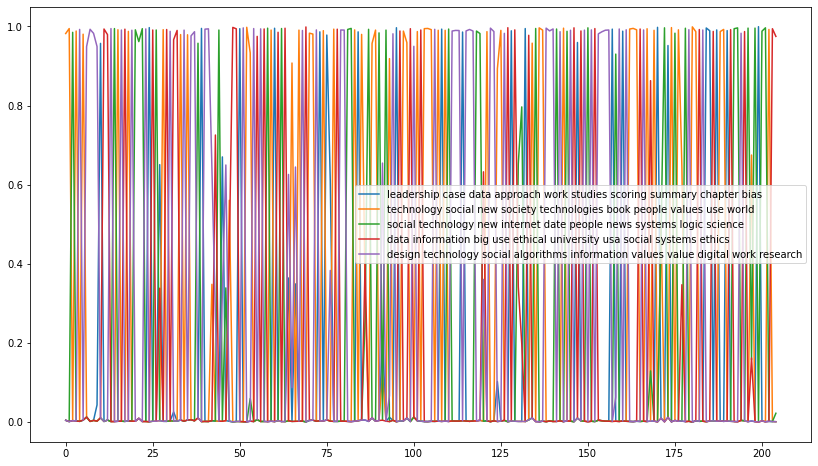

In [222]:
ldaDF = pd.DataFrame(ldaOut, columns=topicLabels).plot(figsize=(14,8))